In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('transfer_player_season_data.csv')

In [3]:
df.head()

,Unnamed: 0,player,pos,exp,num,hgt,inches,team,conf,g,...,ast,to,blk,stl,ftr,pfr,rec,pick,fga,fg_pct
0,1,Garvin Hunt,NaN,Fr,NaN,6-10,82.0,Penn,Ivy,6,...,19.7,52.4,0.0,6.5,0.0,0.0,21.2,NaN,1,0.000000
1,2,Renaldo Woolridge,NaN,Fr,NaN,6-9,81.0,Tennessee,SEC,32,...,10.0,12.9,3.2,0.8,18.9,4.4,87.0,NaN,90,0.311111
2,3,John Peterson,NaN,Fr,NaN,6-7,79.0,Samford,SC,8,...,0.0,23.6,0.0,2.5,66.7,0.0,NaN,NaN,6,0.000000
3,4,Tyree Graham,NaN,Fr,NaN,6-1,73.0,Texas Tech,B12,12,...,15.1,25.4,0.6,1.0,31.3,3.8,36.4,NaN,48,0.333333
4,5,C.J. Reed,NaN,Fr,NaN,6-3,75.0,Bethune Cookman,MEAC,30,...,29.4,21.8,0.2,2.1,33.8,2.0,NaN,NaN,426,0.352113


In [4]:
df.columns

Index(['Unnamed: 0', 'player', 'pos', 'exp', 'num', 'hgt', 'inches', 'team',
       'conf', 'g', 'min', 'mpg', 'ppg', 'oreb', 'dreb', 'rpg', 'apg', 'tov',
       'ast_to', 'spg', 'bpg', 'usg', 'ortg', 'efg', 'ts', 'year', 'id', 'fgm',
       'ftm', 'fta', 'ft_pct', 'two_m', 'two_a', 'two_pct', 'three_m',
       'three_a', 'three_pct', 'dunk_m', 'dunk_a', 'dunk_pct', 'rim_m',
       'rim_a', 'rim_pct', 'mid_m', 'mid_a', 'mid_pct', 'porpag', 'dporpag',
       'adj_oe', 'drtg', 'adj_de', 'stops', 'obpm', 'dbpm', 'bpm', 'oreb_rate',
       'dreb_rate', 'ast', 'to', 'blk', 'stl', 'ftr', 'pfr', 'rec', 'pick',
       'fga', 'fg_pct'],
      dtype='object')

In [5]:
df_num = df[['inches','g', 'min', 'mpg', 'ppg', 'oreb', 'dreb', 'rpg', 'apg', 'tov',
       'ast_to', 'spg', 'bpg', 'usg', 'ortg', 'efg', 'ts', 'year', 'id', 'fgm',
       'ftm', 'fta', 'ft_pct', 'two_m', 'two_a', 'two_pct', 'three_m',
       'three_a', 'three_pct', 'dunk_m', 'dunk_a', 'dunk_pct', 'rim_m',
       'rim_a', 'rim_pct', 'mid_m', 'mid_a', 'mid_pct', 'porpag', 'dporpag',
       'adj_oe', 'drtg', 'adj_de', 'stops', 'obpm', 'dbpm', 'bpm', 'oreb_rate',
       'dreb_rate', 'ast', 'to', 'blk', 'stl', 'ftr', 'pfr', 'rec', 'pick',
       'fga', 'fg_pct']]

df_cat = df[['player', 'pos', 'exp','team', 'conf']]

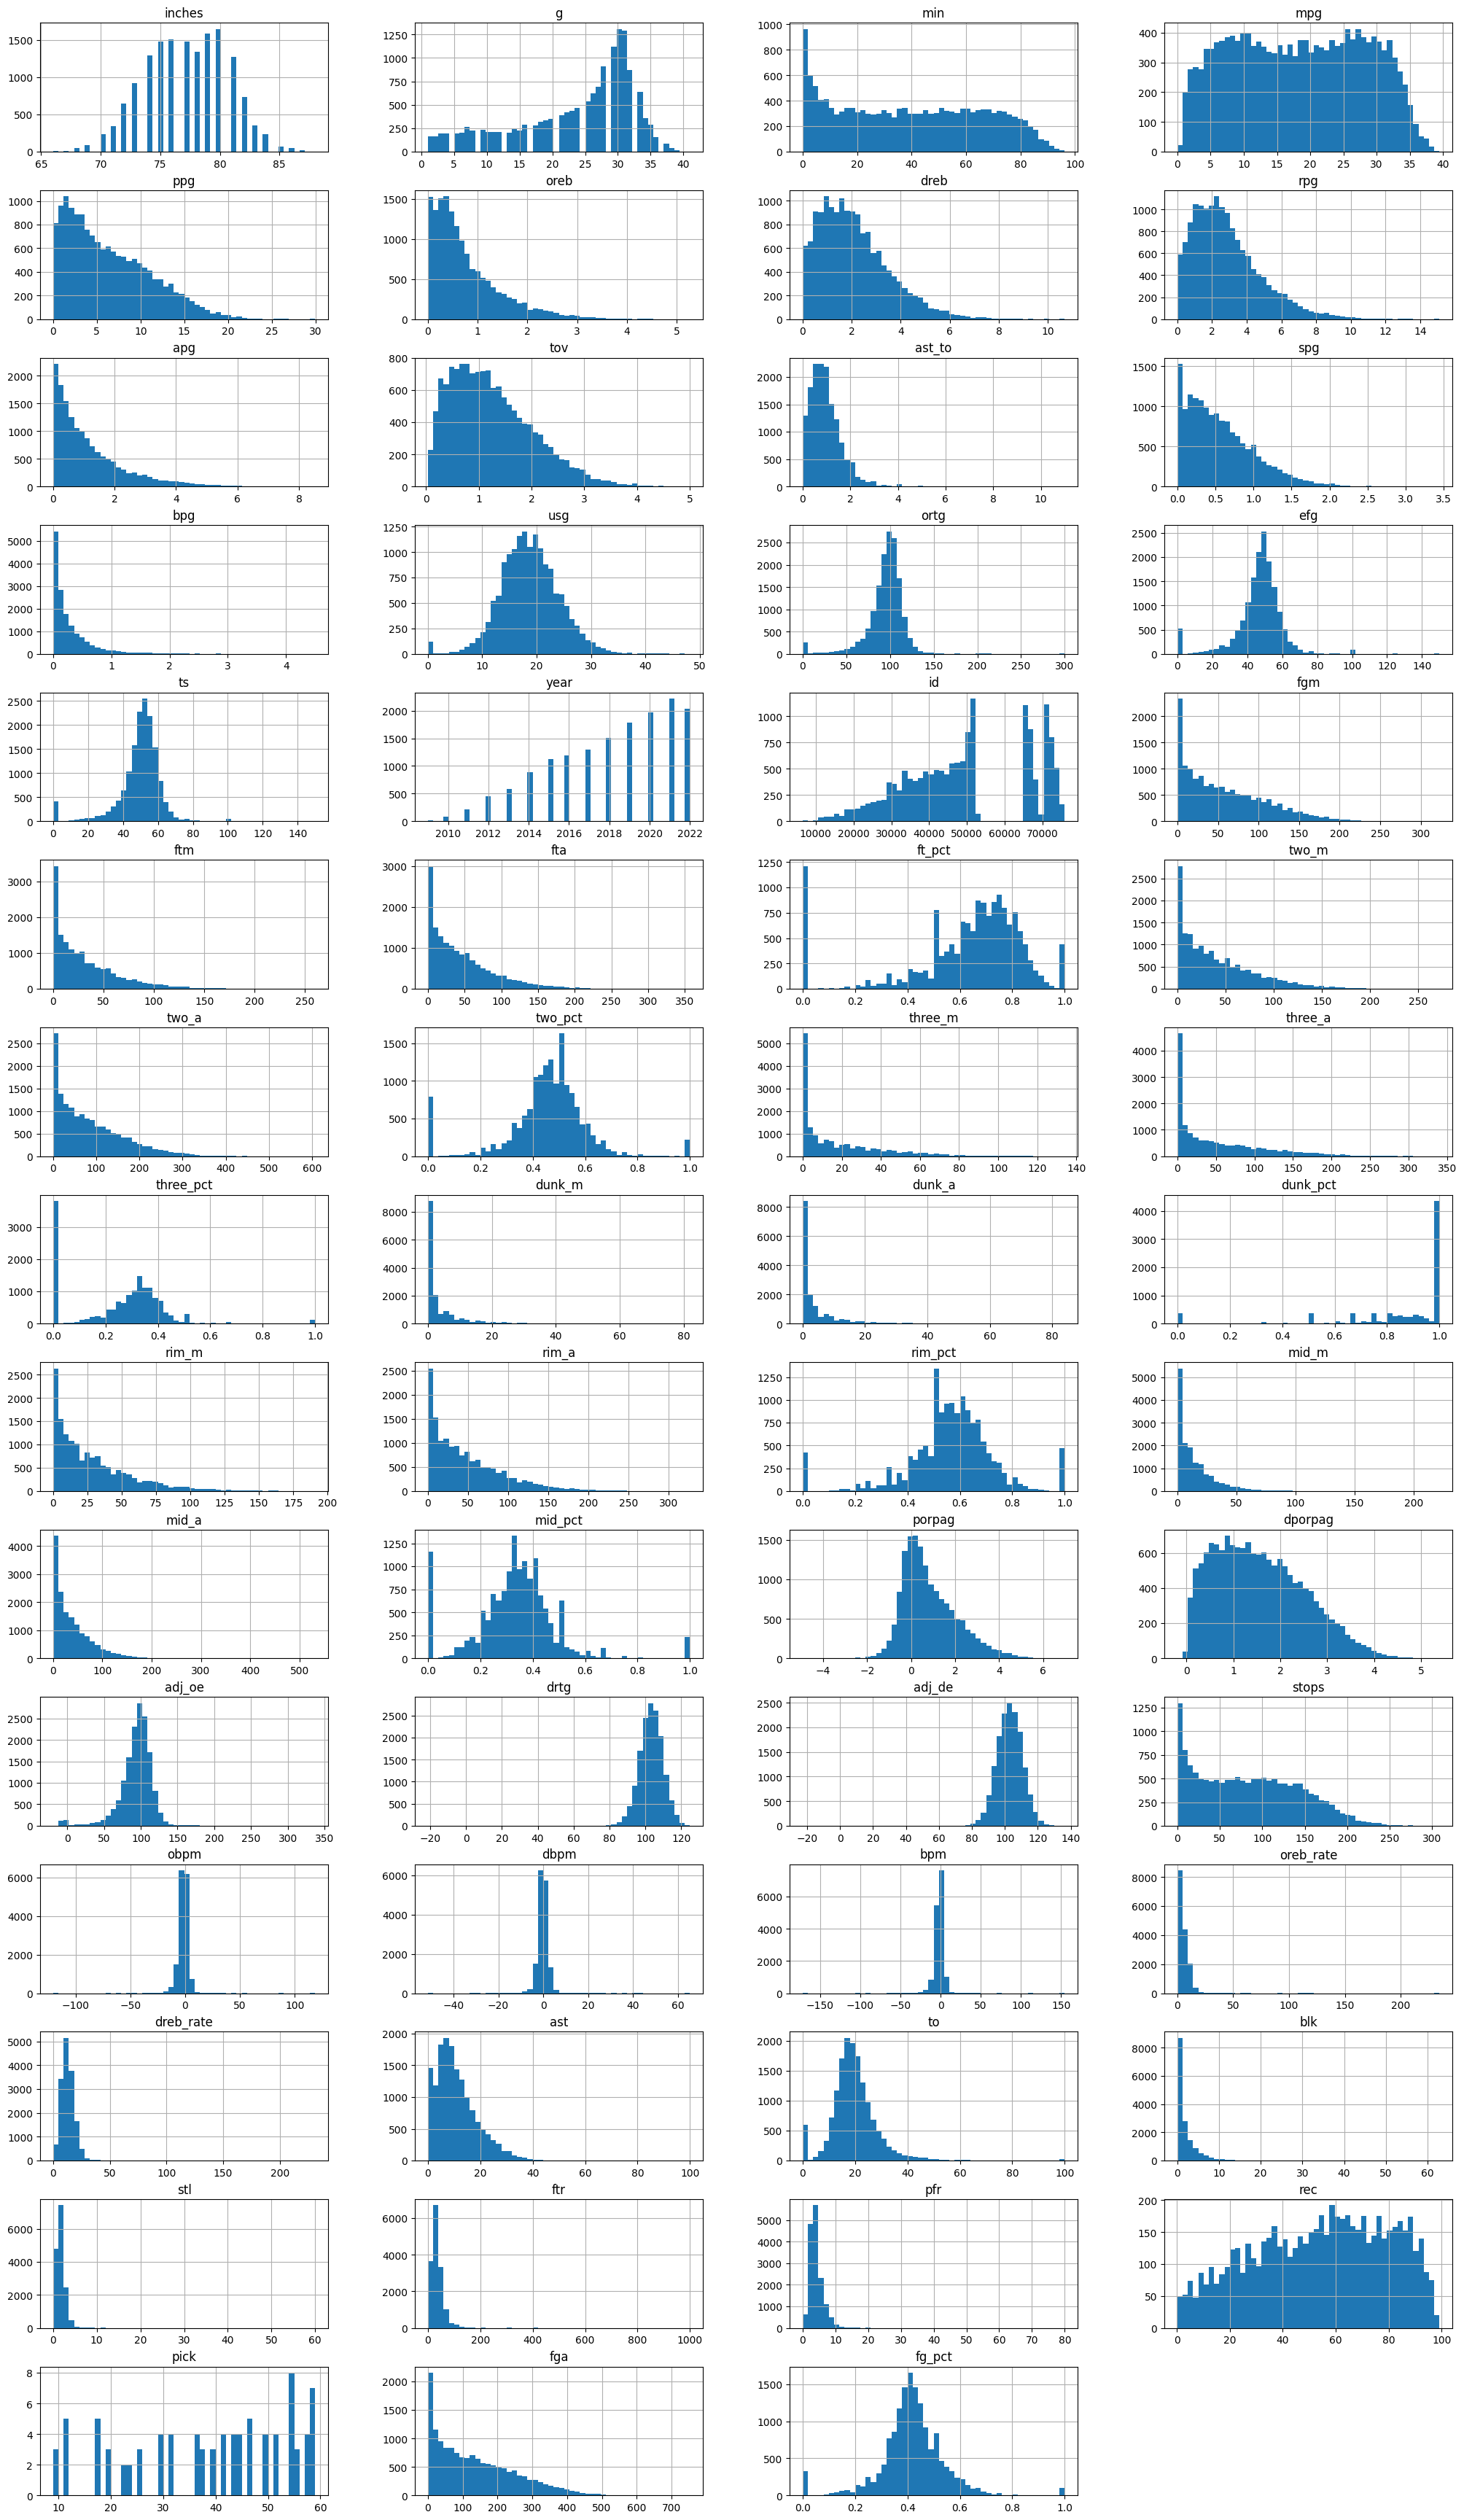

In [6]:
df_num.hist(bins=50, figsize=(25, 50), layout=(17, 4));

In [7]:
colors = ['grey', 'blue', 'blue', 'grey', 'blue', 'grey', 'blue', 'blue', 'blue', 'grey', 'grey', 'grey', 
          'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 
          'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

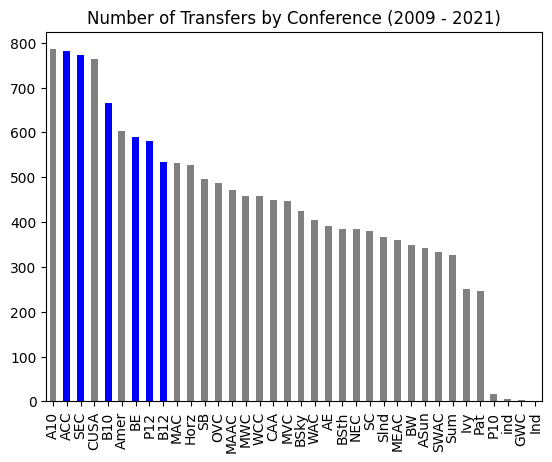

In [8]:
df_cat['conf'].value_counts().plot.bar(color=colors, title='Number of Transfers by Conference (2009 - 2021)');

In [9]:
ptg_b6 = (df_cat['conf'].value_counts()[1] + df_cat['conf'].value_counts()[2] + df_cat['conf'].value_counts()[4] + df_cat['conf'].value_counts()[6] + df_cat['conf'].value_counts()[7] + df_cat['conf'].value_counts()[8]) / len(df_cat['conf'])

print('Percentage of transfers going to Power 6 Conferences: ', np.round(ptg_b6, 4) * 100, '%')

Percentage of transfers going to Power 6 Conferences:  25.53 %


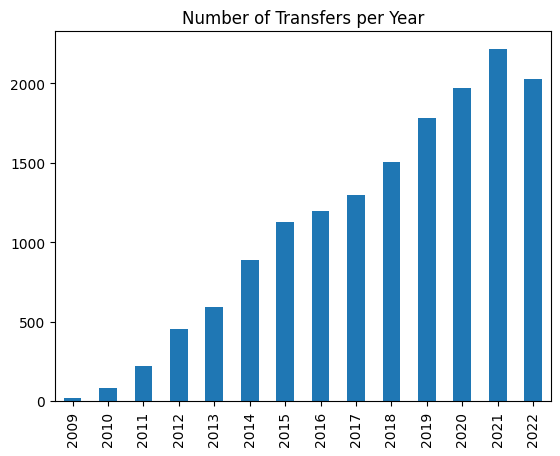

In [10]:
df_num['year'].value_counts().sort_index(ascending=True).plot.bar(title='Number of Transfers per Year');

In [11]:
df_cat['team'].value_counts()[:5]

South Florida        90
George Washington    89
UNLV                 85
Wake Forest          80
Pittsburgh           78
Name: team, dtype: int64

In [12]:
df_cat['team'].value_counts()[-5:]

Bellarmine     7
Merrimack      6
USC Upstate    3
St. Thomas     3
IPFW           1
Name: team, dtype: int64

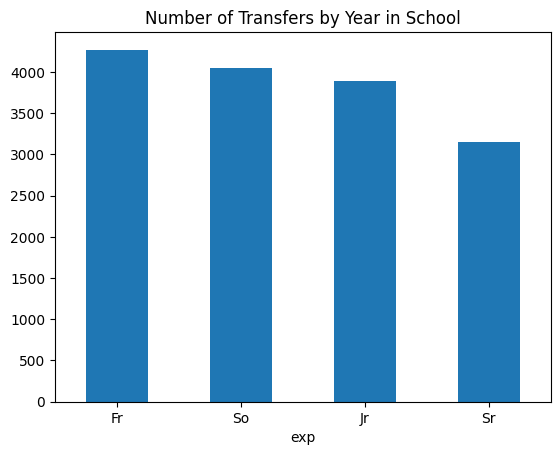

In [13]:
df_cat.groupby(['exp'])['player'].count().sort_values(ascending=False).plot.bar(rot=0, title='Number of Transfers by Year in School');

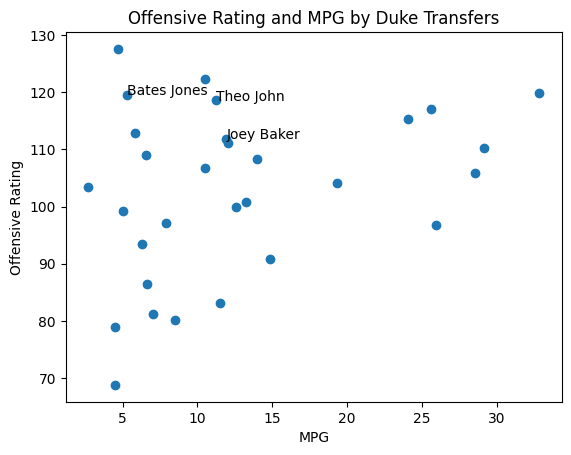

In [14]:
import matplotlib.pyplot as plt

df_duke = df[df['team'] == 'Duke']

plt.scatter(df_duke['mpg'], df_duke['ortg'])
for i in range(len(df_duke['mpg'])):
    if df_duke['year'].iloc[i] == 2022:
        plt.text(df_duke['mpg'].iloc[i], df_duke['ortg'].iloc[i], df_duke['player'].iloc[i])
plt.title('Offensive Rating and MPG by Duke Transfers')
plt.xlabel('MPG')
plt.ylabel('Offensive Rating')
plt.show()